In [1]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/


Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Paths to dataset directories
base_path = '/content/drive/MyDrive/Datasets' #Path from your datasets
train_path = os.path.join(base_path, 'Training') #make sure your path name is same as your save
valid_path = os.path.join(base_path, 'Validation') #make sure your path name is same as your save
test_path = os.path.join(base_path, 'Testing') #make sure your path name is same as your save

# Parameters
img_height = 150
img_width = 150
batch_size = 32
epochs = 50  # Adjust as needed

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

valid_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = valid_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 4200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 1442s 10s/step - accuracy: 0.3691 - loss: 1.2551 - val_accuracy: 0.4683 - val_loss: 1.0012
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 317ms/step - accuracy: 0.4760 - loss: 0.9855 - val_accuracy: 0.5092 - val_loss: 0.9632
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.5005 - loss: 0.9572 - val_accuracy: 0.6292 - val_loss: 0.8754
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 83s 322ms/step - accuracy: 0.5793 - loss: 0.8682 - val_accuracy: 0.6300 - val_loss: 0.7559
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 324ms/step - accuracy: 0.6310 - loss: 0.8025 - val_accuracy: 0.6967 - val_loss: 0.7623
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 311ms/step - accuracy: 0.6309 - loss: 0.7919 - val_accuracy: 0.6892 - val_loss: 0.7093
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 43s 313ms/step - accuracy: 0.6448 - loss: 0.7554 - val_accuracy: 0.7167 - val_loss: 0.6575
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 316ms/step - accuracy: 0.6743 - loss: 0.7363 - val

In [ ]:
# Testing
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 198s 11s/step - accuracy: 0.9383 - loss: 0.1514
Test Accuracy: 88.17%


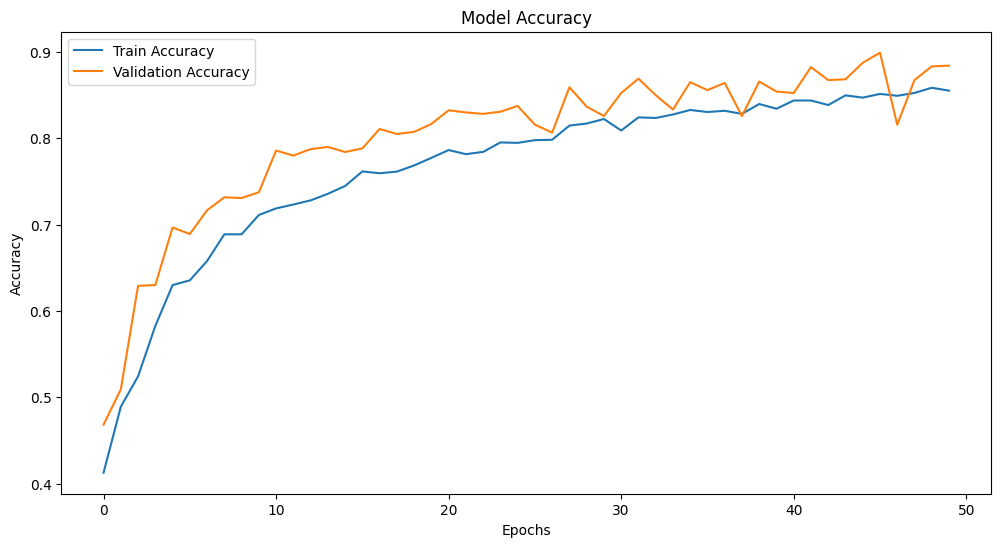

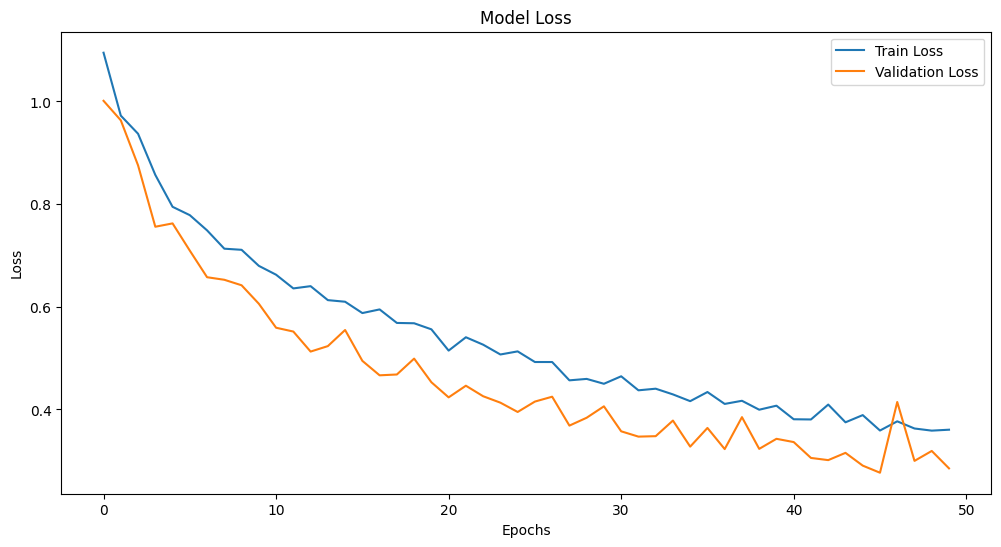

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


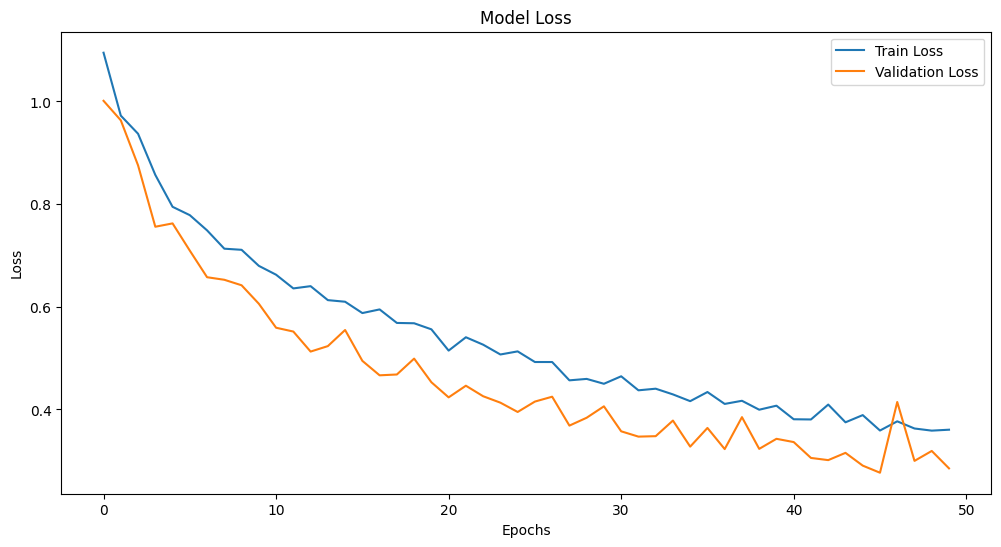

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step


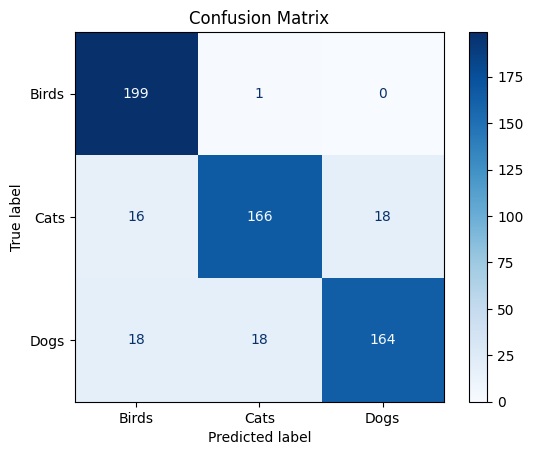

Classification Report:
              precision    recall  f1-score   support

       Birds       0.85      0.99      0.92       200
        Cats       0.90      0.83      0.86       200
        Dogs       0.90      0.82      0.86       200

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [ ]:
_from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Predict classes for the test dataset
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))